In [42]:
# 1. Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import pylab as pl

In [23]:
# 2. Reading the data as dataframe
bankData = pd.read_csv('bank-full.csv')

In [24]:
# 3 a) Shape of the data
bankData.shape
# There are 45,211 rows and 17 columns

(45211, 17)

In [25]:
# 3 b) Data type of each attribute
bankData.dtypes
# 10 Object and 7 integer type attributes; Target variable is also Object type. We need to change object types to integer types
# for model building

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [26]:
# 3 c) Checking the presence of missing values
bankData.isnull().sum()
# No missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [27]:
bankData.head()
# Ranking is not important for categorical variables; One hot encoding is sufficient for categorization

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [28]:
# 3 d) 5 point summary of numerical attributes
bankData.describe().T
# Data looks legit as all stats seems reasonable
# Looking at the age column, data looks representative of the true age distribution of the adult population
# Minimum average yearly balance is negative for some customers i.e. quite possible in real life scenario
# Some doubts on pdays i.e. number of days that passed by after the client was last contacted cannot be negative
# pdays can be 0 at max

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


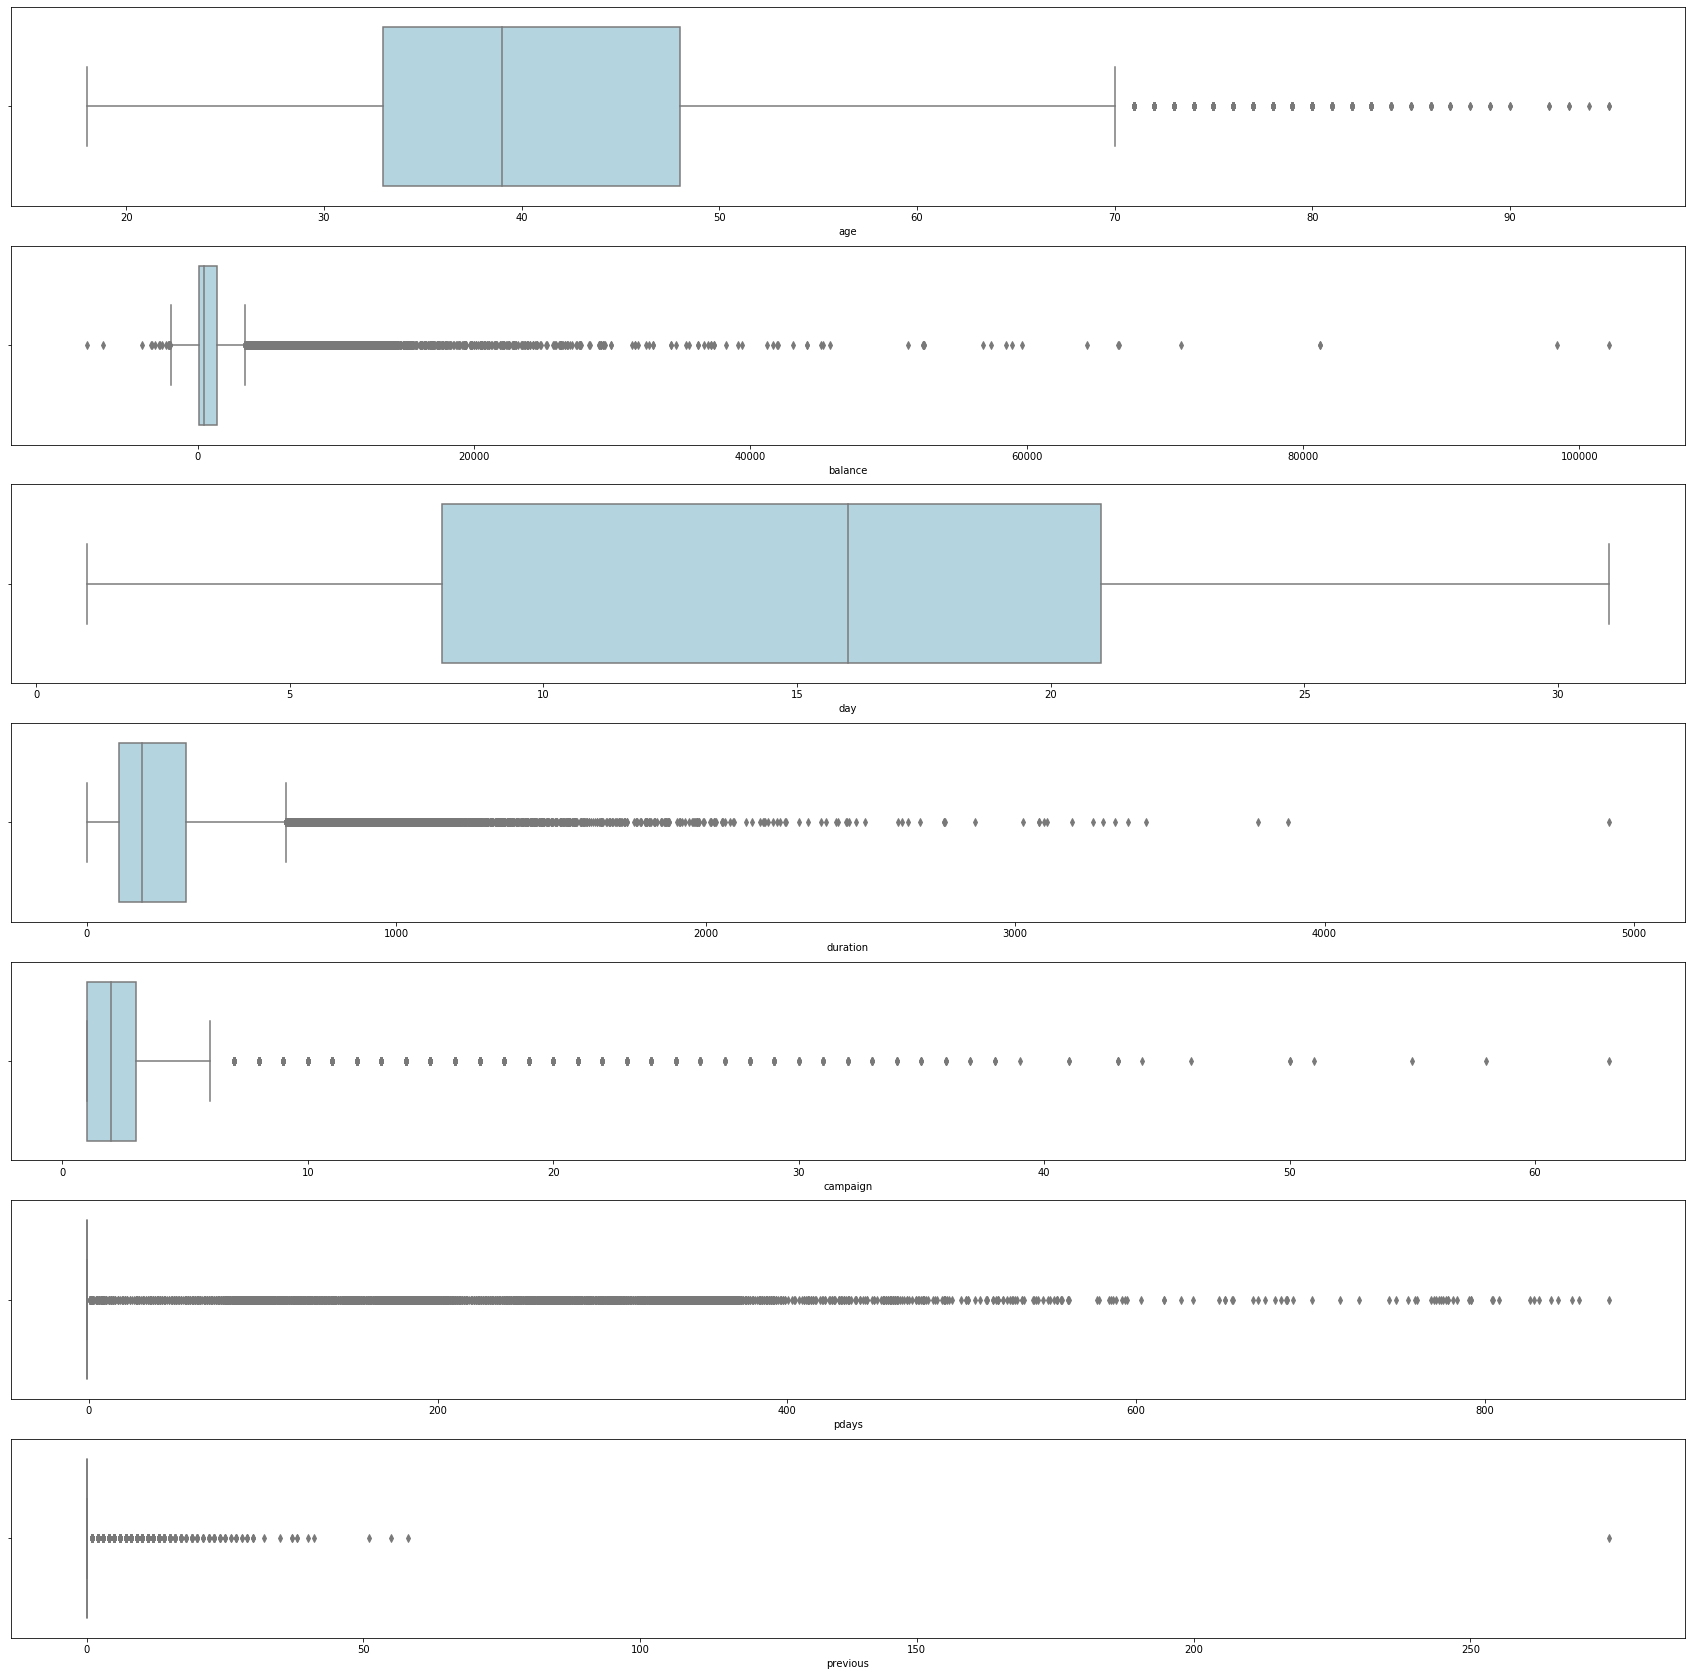

In [29]:
# 3 e) Checking the presence of outliers
plt.figure(figsize = (30,30))
plt.subplot(7,1,1)
sns.boxplot(x = bankData.age, color = 'lightblue')

plt.subplot(7,1,2)
sns.boxplot(x = bankData.balance, color = 'lightblue')

plt.subplot(7,1,3)
sns.boxplot(x = bankData.day, color = 'lightblue')

plt.subplot(7,1,4)
sns.boxplot(x = bankData.duration, color = 'lightblue')

plt.subplot(7,1,5)
sns.boxplot(x = bankData.campaign, color = 'lightblue')

plt.subplot(7,1,6)
sns.boxplot(x = bankData.pdays, color = 'lightblue')

plt.subplot(7,1,7)
sns.boxplot(x = bankData.previous, color = 'lightblue')

# Outliers present for Age, Balance, Duration, Campaign, pdays & Previous. Only Day has no outliers
# Age & Campaign have only fewer proportion of  extreme values compared to Balance , Duration, pdays & previous

In [30]:
# 4. Data Preparation & speration into training & test stage
# Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
le = LabelEncoder()
bankData['Target'] = le.fit_transform(bankData['Target'])
bankData['job'] = le.fit_transform(bankData['job'])
bankData['marital'] = le.fit_transform(bankData['marital'])
bankData['education'] = le.fit_transform(bankData['education'])
bankData['default'] = le.fit_transform(bankData['default'])
bankData['housing'] = le.fit_transform(bankData['housing'])
bankData['loan'] = le.fit_transform(bankData['loan'])
bankData['contact'] = le.fit_transform(bankData['contact'])
bankData['month'] = le.fit_transform(bankData['month'])
bankData['poutcome'] = le.fit_transform(bankData['poutcome'])

In [31]:
bankData.info()
# We have only integer data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
Target       45211 non-null int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [32]:
# All the negative value of pdays i.e. days passed by after the client was last contacted from a previous campaign is NIL
bankData[bankData['pdays'] < 0] = 0

In [33]:
dummy_variables = ["Target", "duration"] # Given in the problem statement that duration is only for benchmarking purposes
X = bankData.drop(dummy_variables , axis = 1)
Y = bankData['Target']
X_train, X_test , y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [35]:
# 5. A) Logistic Regression
model_LR = LogisticRegression(solver = 'liblinear')
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
print(model_LR.score(X_train, y_train))
print(model_LR.score(X_test, y_test))
# Seems to be no overfitting as training score is not 1.0
# High Accuracy scores with test data

0.967105886813916
0.965644352698319


In [16]:
y_pred_LR = model_LR.predict(X_test)
print("Classification Report")
print(metrics.classification_report(y_test,y_pred_LR, labels = [1,0]))
# Target column is not equally represented (581 vs 12983), hence class level metric becomes important
# Lower score of recall, precison and f1 when compared to accuracy score; Need to check other models

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.40      0.50       581
           0       0.97      0.99      0.98     12983

    accuracy                           0.97     13564
   macro avg       0.82      0.70      0.74     13564
weighted avg       0.96      0.97      0.96     13564



In [102]:
# 5. B) Naive Bayes
model_NB = GaussianNB()
model_NB.fit(X_train , y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
print(model_NB.score(X_train, y_train))
print(model_NB.score(X_test, y_test))
# Seems model doesn't suffer from overfitting as training score is not 1.0
# Accuracy scores for the test data is 0.86 but lower than that of Logistic Regression

0.863430972920024
0.862135063403126


In [39]:
y_pred_NB = model_NB.predict(X_test)
print("Classification Report")
print(metrics.classification_report(y_test,y_pred_NB, labels = [1,0]))
# Target column is not equally represented (581 vs 12983), hence class level metric becomes important
# Strong score of recall but poor precison pulls overall f1 down and makes it lower than that of Logistic Regression

Classification Report
              precision    recall  f1-score   support

           1       0.23      0.98      0.38       581
           0       1.00      0.86      0.92     12983

    accuracy                           0.86     13564
   macro avg       0.62      0.92      0.65     13564
weighted avg       0.97      0.86      0.90     13564



In [103]:
# 5. C) Decision Trees
model_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [51]:
print(model_DT.score(X_train, y_train))
print(model_DT.score(X_test, y_test))
# A case of overfitting because training score is 1.0
# Accuracy score of the test data is higher than that of Naive Bayes but lower than that of Logistic Regression

1.0
0.9526688292539074


In [52]:
y_pred_DT = model_DT.predict(X_test)
print("Classification Report")
print(metrics.classification_report(y_test,y_pred_DT, labels = [1,0]))
# Target column is not equally represented (581 vs 12983), hence class level metric becomes important
# Lower recall but higher precision w.r.t. Naive Bayes; Overall f1-score is higher
# Higher recall but lower precision w.r.t. Logistic Regression; Overall f1-score is lower
# Mid-way between Naive Bayes and Logistic Regression in terms of f1-score

Classification Report
              precision    recall  f1-score   support

           1       0.45      0.47      0.46       581
           0       0.98      0.97      0.98     12983

    accuracy                           0.95     13564
   macro avg       0.71      0.72      0.72     13564
weighted avg       0.95      0.95      0.95     13564



In [104]:
# 6. a) Random Forest vs Decision Tree
rfcl = RandomForestClassifier(n_estimators = 50, random_state = 1, max_features = 6)
rfcl.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [105]:
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))
# Overfittting has reduced w.r.t. Decision tree as training score has come down from 1 to 0.99
# Score of test data has improved from 0.95 to 0.97

0.9998736057130218
0.9662341492185196


In [48]:
y_pred_RF = rfcl.predict(X_test)
print("Classification Report")
print(metrics.classification_report(y_test,y_pred_RF, labels = [1,0]))
# Target column is not equally represented (581 vs 12983), hence class level metric becomes important
# Precision has improved & recall remained same w.r.t. Decision tree model
# Higher precision led to improvement in f1-score

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.47      0.54       581
           0       0.98      0.99      0.98     12983

    accuracy                           0.97     13564
   macro avg       0.81      0.73      0.76     13564
weighted avg       0.96      0.97      0.96     13564



In [106]:
# 6 b) Bagging vs Naive Bayes
bgcl = BaggingClassifier(base_estimator = model_NB, n_estimators = 50, random_state = 1)
bgcl.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=50, n_jobs=None,
                  oob_score=False, random_state=1, verbose=0, warm_start=False)

In [107]:
print(bgcl.score(X_train, y_train))
print(bgcl.score(X_test, y_test))
# A case of no overfitting as training sore is not 1.0
# However, there is no improvement in accuracy scores for test data w.r.t. Naive Bayes

0.8626726071981546
0.8633883810085521


In [110]:
y_pred_BG = bgcl.predict(X_test)
print("Classification Report")
print(metrics.classification_report(y_test,y_pred_BG, labels = [1,0]))
# Target column is not equally represented (581 vs 12983), hence class level metric becomes important
# Precision went up by 0.01 while recall went down by 0.01; Keeping f1-score same
# Hence, we can conclude that Ensemble technique has not added much value in this scenario

Classification Report
              precision    recall  f1-score   support

           1       0.24      0.97      0.38       581
           0       1.00      0.86      0.92     12983

    accuracy                           0.86     13564
   macro avg       0.62      0.92      0.65     13564
weighted avg       0.97      0.86      0.90     13564



In [65]:
# 6 c) Adaptive Boosting vs Naive Bayes
# Accuracy of Ada has drastically gone down to 0.08 for the test data; We should try another model
#abcl = AdaBoostClassifier(base_estimator = model_NB, n_estimators = 50, random_state = 1)
#abcl.fit(X_train, y_train)
#print(abcl.score(X_train, y_train))
#print(abcl.score(X_test, y_test))

0.9584794767276519
0.0867738130345031


In [67]:
# 6 c) Adaptive Boosting vs Logistic Regression
# Accuracy of Ada has gone down marginally from 0.97 to 0.96 for the test data; Lets try with Decision trees once !
#abcl = AdaBoostClassifier(base_estimator = model_LR, n_estimators = 50, random_state = 1)
#abcl.fit(X_train, y_train)
#print(abcl.score(X_train, y_train))
#print(abcl.score(X_test, y_test))

0.9645780010743514
0.9638012385726924


In [112]:
# 6 c) Adaptive Boosting vs Decision Trees
# Best performance of Ada Boosting came only with Decision trees as it needs a simple model to built upon
# A case of no overfitting as training score is not 1.0
# Accuracy has gone up from 0.95 to 0.97 and even betterd the accuracy score obtained with Logistic Regression as the base
abcl = AdaBoostClassifier(n_estimators = 50, random_state = 1)
abcl.fit(X_train, y_train)
print(abcl.score(X_train, y_train))
print(abcl.score(X_test, y_test))

0.9696653711252251
0.9673400176938957


In [111]:
y_pred_AB = abcl.predict(X_test)
print("Classification Report")
print(metrics.classification_report(y_test,y_pred_AB, labels = [1,0]))
# Target column is not equally represented (581 vs 12983), hence class level metric becomes important
# Gains are clear in terms of precision, recall and f1 score w.r.t Decision tree

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.47      0.55       581
           0       0.98      0.99      0.98     12983

    accuracy                           0.97     13564
   macro avg       0.82      0.73      0.77     13564
weighted avg       0.96      0.97      0.96     13564



In [113]:
# 6 d) Gradient Boosting vs Logistic Regression
# We have built upon Decision trees & Naive Bayes as base estimators; Lets have one model with base as Logistic Regression
gbcl = GradientBoostingClassifier(init = model_LR,n_estimators = 50, random_state = 1)
gbcl.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse',
                           init=LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='liblinear',
                                                   tol=0.0001, verbose=0,
                                                   warm_start=False),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
       

In [114]:
print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))
# A case of no overfitting as training score is not 1.0
# Accuracy score for the test set has improved just w.r.t. Logistic Regression from 0.965 to 0.967

0.9713716939994312
0.9670451194337953


In [116]:
y_pred_GB = gbcl.predict(X_test)
print("Classification Report")
print(metrics.classification_report(y_test,y_pred_GB, labels = [1,0]))
# Target column is not equally represented (581 vs 12983), hence class level metric becomes important
# Here, Gradient Boosting is a  clear winner in terms of recall and precision remains same; Hence, f1-score has gone up

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.47      0.55       581
           0       0.98      0.99      0.98     12983

    accuracy                           0.97     13564
   macro avg       0.82      0.73      0.77     13564
weighted avg       0.96      0.97      0.96     13564



In [115]:
# 7) Obtain probabilities for all 7 models
probas1_ = model_LR.fit(X_train, y_train).predict_proba(X_test) # Logistic Regression
probas2_ = model_NB.fit(X_train, y_train).predict_proba(X_test) # Naive Bayes
probas3_ = model_DT.fit(X_train, y_train).predict_proba(X_test) # Decision Trees
probas4_ = rfcl.fit(X_train, y_train).predict_proba(X_test) # Random Forest
probas5_ = bgcl.fit(X_train, y_train).predict_proba(X_test) # Bagging
probas6_ = abcl.fit(X_train, y_train).predict_proba(X_test) # Adaptive Boosting
probas7_ = gbcl.fit(X_train, y_train).predict_proba(X_test) # Gradient Boosting

In [75]:
# Compute ROC and area of the curve for Logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:,1])
roc_auc1 = auc(fpr1,tpr1)
print("Area under the ROC curve: %f" % roc_auc1)

Area under the ROC curve: 0.967852


In [76]:
# Compute ROC and area of the curve for Naive Bayes
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:,1])
roc_auc2 = auc(fpr2,tpr2)
print("Area under the ROC curve: %f" % roc_auc2)

Area under the ROC curve: 0.943268


In [79]:
# Compute ROC and area of the curve for Decision Trees
fpr3, tpr3, thresholds3 = roc_curve(y_test, probas3_[:,1])
roc_auc3 = auc(fpr3,tpr3)
print("Area under the ROC curve: %f" % roc_auc3)

Area under the ROC curve: 0.722899


In [80]:
# Compute ROC and area of the curve for Random Forest
fpr4, tpr4, thresholds4 = roc_curve(y_test, probas4_[:,1])
roc_auc4 = auc(fpr4,tpr4)
print("Area under the ROC curve: %f" % roc_auc4)

Area under the ROC curve: 0.969579


In [95]:
# Compute ROC and area of the curve for Bagging
fpr5, tpr5, thresholds5 = roc_curve(y_test, probas5_[:,1])
roc_auc5 = auc(fpr5,tpr5)
print("Area under the ROC curve: %f" % roc_auc5)

Area under the ROC curve: 0.949307


In [82]:
# Compute ROC and area of the curve for Adaptive Boosting
fpr6, tpr6, thresholds6 = roc_curve(y_test, probas6_[:,1])
roc_auc6 = auc(fpr6,tpr6)
print("Area under the ROC curve: %f" % roc_auc6)

Area under the ROC curve: 0.974258


In [89]:
# Compute ROC and area of the curve for Gradient Boosting
fpr7, tpr7, thresholds7 = roc_curve(y_test, probas7_[:,1])
roc_auc7 = auc(fpr7,tpr7)
print("Area under the ROC curve: %f" % roc_auc7)

Area under the ROC curve: 0.972805


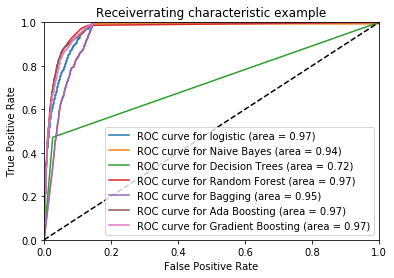

In [96]:
# Plot the ROC
# Plot the ROC curve
pl.clf()
pl.plot(fpr1,tpr1,label = 'ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2,tpr2,label = 'ROC curve for Naive Bayes (area = %0.2f)' % roc_auc2)
pl.plot(fpr3,tpr3,label = 'ROC curve for Decision Trees (area = %0.2f)' % roc_auc3)
pl.plot(fpr4,tpr4,label = 'ROC curve for Random Forest (area = %0.2f)' % roc_auc4)
pl.plot(fpr5,tpr5,label = 'ROC curve for Bagging (area = %0.2f)' % roc_auc5)
pl.plot(fpr6,tpr6,label = 'ROC curve for Ada Boosting (area = %0.2f)' % roc_auc6)
pl.plot(fpr7,tpr7,label = 'ROC curve for Gradient Boosting (area = %0.2f)' % roc_auc7)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [ ]:
# We can see high AUC values for Ensemble models such as Random Forest, Ada Boosting and Gradient Boosting
# Bagging is better than its base i.e. Naive Bayes but lagging behind as the base model may not be complex
# Area under curve with bagging may improve with a complex decision tree
# In terms of standard classification models, Logistic Regression stands out w.r.t. Naive Bayes and Decision Tree models
# Overall, Ada Boosting has the highest score and is the best model for the case in hand